In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [2]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

# Standarization of data

In [4]:
meanbycol = np.mean(data,axis=0)

In [5]:
stdbycol = np.std(data,axis=0)

In [6]:
scaled_data = (data-meanbycol)/stdbycol

In [7]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

same work is done by Standard Scaler function

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
sc.fit_transform(data)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

# covariance matrix from scaled data

In [11]:
cov_mat=np.cov(scaled_data.T)

In [12]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [14]:
eig_val,eig_vect=eig(cov_mat)

In [15]:
eig_val

array([2.40938985+0.j, 0.25727682+0.j])

In [16]:
eig_vect

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
eig_vect.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

same work is done by PCA library of sklearn

In [20]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [22]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [23]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
df.drop(labels=['Id number','Type of glass'],axis=1,inplace=True)

In [27]:
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [29]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [30]:
scaled_df=pd.DataFrame(data=scaled_df,columns=df.columns)

In [31]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [35]:
pc_df=pca.fit_transform(scaled_df)

In [36]:
pc_df=pd.DataFrame(data=pc_df)

In [37]:
pc_df

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [38]:
var=pca.explained_variance_ratio_

In [39]:
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [41]:
sum(var)*100
# it is telling that almost 99.99% data we will get from all these features

99.99999999999997

In [43]:
sorted(var,reverse=True)

[0.27901819179456455,
 0.22778579831670398,
 0.1560937771094048,
 0.12865138291980238,
 0.10155580523615623,
 0.05862613252208685,
 0.04099538259055583,
 0.007094771974823584,
 0.0001787575359017249]

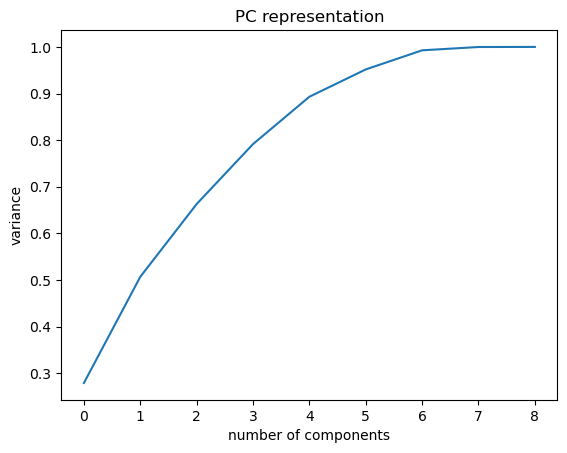

In [44]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel("number of components")
plt.ylabel("variance")
plt.title("PC representation")
plt.show()

## from this graph we get to know that we only need 7 (0-6) features bcs after that we will not get too much changes

In [47]:
pca2=PCA(n_components=7)
# earlier we were taking all components now we will take only first 7 components

In [48]:
pc_data=pca2.fit_transform(scaled_df)